(35887, 48, 48, 1)
(35887, 7)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_14 (Conv2D)      

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


897/897 [==============================] - 12s 13ms/step - loss: 1.8253 - accuracy: 0.2449
Epoch 2/80
897/897 [==============================] - 12s 13ms/step - loss: 1.7943 - accuracy: 0.2517
Epoch 3/80
897/897 [==============================] - 12s 13ms/step - loss: 1.6755 - accuracy: 0.3203
Epoch 4/80
897/897 [==============================] - 12s 13ms/step - loss: 1.5237 - accuracy: 0.4018
Epoch 5/80
897/897 [==============================] - 12s 13ms/step - loss: 1.4374 - accuracy: 0.4418
Epoch 6/80
897/897 [==============================] - 12s 13ms/step - loss: 1.3980 - accuracy: 0.4582
Epoch 7/80
897/897 [==============================] - 12s 13ms/step - loss: 1.3357 - accuracy: 0.4875
Epoch 8/80
897/897 [==============================] - 12s 13ms/step - loss: 1.3182 - accuracy: 0.4959
Epoch 9/80
897/897 [==============================] - 12s 13ms/step - loss: 1.2746 - accuracy: 0.5093
Epoch 10/80
897/897 [==============================] - 12s 13ms/step - loss: 1.2550 - accurac

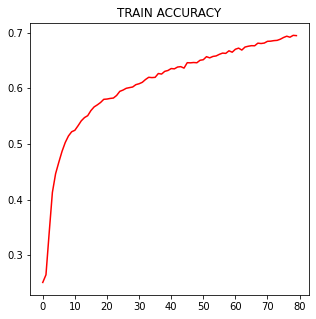

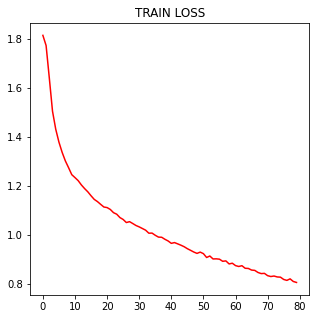

Train loss: 0.6551313400268555
Train accuracy: 75.22031664848328
Test loss: 1.084559679031372
Test accuracy: 63.569241762161255
[[ 557   13   67   54  141   25  128]
 [  25   53    9    4    5    5    1]
 [ 142    6  428   68  215   77  107]
 [  59    2   35 1542   42   28   57]
 [ 141    6  131   78  623   15  216]
 [  27    0   94   45   13  588   28]
 [ 110    1   56  139  178   22  772]]
              precision    recall  f1-score   support

           0       0.52      0.57      0.54       985
           1       0.65      0.52      0.58       102
           2       0.52      0.41      0.46      1043
           3       0.80      0.87      0.83      1765
           4       0.51      0.51      0.51      1210
           5       0.77      0.74      0.76       795
           6       0.59      0.60      0.60      1278

    accuracy                           0.64      7178
   macro avg       0.63      0.60      0.61      7178
weighted avg       0.63      0.64      0.63      7178



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Input, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam, Adamax, SGD, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import *
from sklearn.model_selection import *

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/emotionRec/fer2013.csv')
#Convert the 1D array into a 48*48*1 array as input to the model
images = dataset.iloc[:, 1].values
X= []
for image in images:
  each_image = image.split(" ")
  each_image = np.asarray([float(x)/255.0 for x in each_image])
  each_image = np.reshape(each_image, (48,48,1))
  X.append(each_image)
X = np.asarray(X)
print(X.shape)
Y = []
labels = dataset.iloc[:,0].values
from keras.utils import to_categorical
Y=to_categorical(labels)
Y = np.asarray(Y)
print(Y.shape)

#Split into train test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#1st convolution layer
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
 
model.add(Dense(7, activation='softmax'))

print(model.summary())

x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
x_train=x_train.reshape(x_train.shape[0],48,48,1)
x_test=x_test.reshape(x_test.shape[0], 48,48,1)

gen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
batch_size=32
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
#early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
obj=Adamax()
model.compile(optimizer=obj,
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

#steps_per_epoch = len(X_train)//batch_size
history=model.fit_generator(train_generator, steps_per_epoch=len(x_train)//batch_size, epochs=80)
# summarize history for accuracy  
   
plt.figure(figsize=(5,5))
accuracy=history.history['accuracy']                      
loss=history.history['loss']

epoch_numbers=range(len(accuracy))
plt.plot(epoch_numbers, accuracy, color='red')
plt.title("TRAIN ACCURACY")
plt.show()

plt.figure(figsize=(5,5))
plt.plot(epoch_numbers, loss, color='red')
plt.title("TRAIN LOSS")
plt.show() 



train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 



test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

predictions = model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
   pred_list.append(np.argmax(i))
 
for i in y_test:
   actual_list.append(np.argmax(i))
 
print(confusion_matrix(actual_list, pred_list))
print(classification_report(actual_list, pred_list))
from keras.models import load_model
model_json = model.to_json()



In [1]:
from google.colab import drive
drive.mount('/content/drive') 


Mounted at /content/drive
